In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import cv2 
import PIL.Image as Image

### Importing the Dog vs Cat dataset from Kaggle 

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

In [40]:
import zipfile
import os

In [41]:
zip_path = './dogs-vs-cats.zip'
extract_path = './data'  

with zipfile.ZipFile(zip_path, 'r') as zip_ref: 
    zip_ref.extractall(extract_path) 
    
dataset_loc = extract_path 
dataset_loc 

'./data'

In [46]:
def unzip_file(file_path):
    zip_path = f'data/{file_path}.zip'
    extract_path = './data/'
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref: 
        zip_ref.extractall(extract_path)
 

In [47]:
unzip_file('train')
unzip_file('test1') 

In [48]:
import pathlib

train_data_dir = 'data/train' 
train_data_dir = pathlib.Path(train_data_dir)

test_data_dir = 'data/test1'  
test_data_dir = pathlib.Path(test_data_dir)

train_data_dir, test_data_dir  

(WindowsPath('data/train'), WindowsPath('data/test1'))

In [49]:
# to get all train image paths 
train_paths = list(train_data_dir.glob('*.jpg')) 
train_paths, len(train_paths)  

([WindowsPath('data/train/cat.0.jpg'),
  WindowsPath('data/train/cat.1.jpg'),
  WindowsPath('data/train/cat.10.jpg'),
  WindowsPath('data/train/cat.100.jpg'),
  WindowsPath('data/train/cat.1000.jpg'),
  WindowsPath('data/train/cat.10000.jpg'),
  WindowsPath('data/train/cat.10001.jpg'),
  WindowsPath('data/train/cat.10002.jpg'),
  WindowsPath('data/train/cat.10003.jpg'),
  WindowsPath('data/train/cat.10004.jpg'),
  WindowsPath('data/train/cat.10005.jpg'),
  WindowsPath('data/train/cat.10006.jpg'),
  WindowsPath('data/train/cat.10007.jpg'),
  WindowsPath('data/train/cat.10008.jpg'),
  WindowsPath('data/train/cat.10009.jpg'),
  WindowsPath('data/train/cat.1001.jpg'),
  WindowsPath('data/train/cat.10010.jpg'),
  WindowsPath('data/train/cat.10011.jpg'),
  WindowsPath('data/train/cat.10012.jpg'),
  WindowsPath('data/train/cat.10013.jpg'),
  WindowsPath('data/train/cat.10014.jpg'),
  WindowsPath('data/train/cat.10015.jpg'),
  WindowsPath('data/train/cat.10016.jpg'),
  WindowsPath('data/train/

In [50]:
# to get all test image paths 
test_paths = list(test_data_dir.glob('*.jpg')) 
test_paths, len(test_paths) 

([WindowsPath('data/test1/1.jpg'),
  WindowsPath('data/test1/10.jpg'),
  WindowsPath('data/test1/100.jpg'),
  WindowsPath('data/test1/1000.jpg'),
  WindowsPath('data/test1/10000.jpg'),
  WindowsPath('data/test1/10001.jpg'),
  WindowsPath('data/test1/10002.jpg'),
  WindowsPath('data/test1/10003.jpg'),
  WindowsPath('data/test1/10004.jpg'),
  WindowsPath('data/test1/10005.jpg'),
  WindowsPath('data/test1/10006.jpg'),
  WindowsPath('data/test1/10007.jpg'),
  WindowsPath('data/test1/10008.jpg'),
  WindowsPath('data/test1/10009.jpg'),
  WindowsPath('data/test1/1001.jpg'),
  WindowsPath('data/test1/10010.jpg'),
  WindowsPath('data/test1/10011.jpg'),
  WindowsPath('data/test1/10012.jpg'),
  WindowsPath('data/test1/10013.jpg'),
  WindowsPath('data/test1/10014.jpg'),
  WindowsPath('data/test1/10015.jpg'),
  WindowsPath('data/test1/10016.jpg'),
  WindowsPath('data/test1/10017.jpg'),
  WindowsPath('data/test1/10018.jpg'),
  WindowsPath('data/test1/10019.jpg'),
  WindowsPath('data/test1/1002.jpg')

In [51]:
# to categorize images by their labels
cats = list(train_data_dir.glob('cat*'))
dogs = list(train_data_dir.glob('dog*')) 


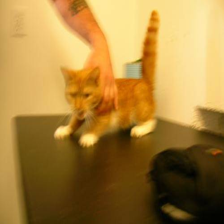

In [52]:
# cat image
Image.open(str(cats[0])).resize((224,224))  

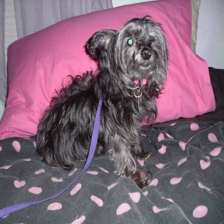

In [53]:
# dog image 
Image.open(str(dogs[0])).resize((224,224)) 

In [54]:
# cat and dog dictionary
cat_dog_dict = {
    'cat': cats,
    'dog': dogs
}

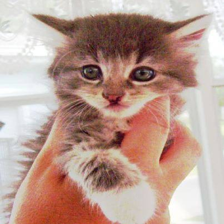

In [57]:
# cat image
Image.open(str(cat_dog_dict['cat'][3])).resize((224,224)) 

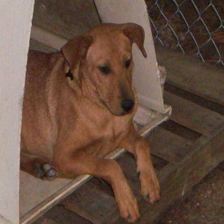

In [58]:
# dog image
Image.open(str(cat_dog_dict['dog'][3])).resize((224,224)) 

In [59]:
# cat dog labels dictionary
cat_dog_labels_dict = {
    'cat': 0,
    'dog': 1
}

In [61]:
# get the size of an image 
img = cv2.imread(cat_dog_dict['cat'][0])
img.shape 

(374, 500, 3)

In [62]:
import os 
import shutil
from pathlib import Path 

output_dir = Path('data/train')
(output_dir / 'cat').mkdir(parents=True, exist_ok=True) 
(output_dir / 'dog').mkdir(parents=True, exist_ok=True)

# move images to subfolders
for label, image_paths in cat_dog_dict.items(): 
    for i, image_path in enumerate(image_paths):
        dest = output_dir / label / f'{label}_{i}.jpg'
        shutil.move(image_path, dest) 



In [ ]:
def is_blurry(image_path, threshold=100):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold, laplacian_var 

folder_path = 'data/train/cat'
blurry_cat_images = []
for filename in os.listdir(folder_path): 
    file_path = os.path.join(folder_path, filename)
    blurry, variance = is_blurry(file_path)
    if blurry: 
        blurry_cat_images.append(file_path)
        # print(f'{filename} is blurry. Variance: {variance}') 

len(blurry_cat_images)

1833

In [67]:
folder_path = 'data/train/dog'
blurry_dog_images = []
for filename in os.listdir(folder_path): 
    file_path = os.path.join(folder_path, filename)
    blurry, variance = is_blurry(file_path)
    if blurry: 
        blurry_dog_images.append(file_path)
        # print(f'{filename} is blurry. Variance: {variance}') 

len(blurry_dog_images)

1043

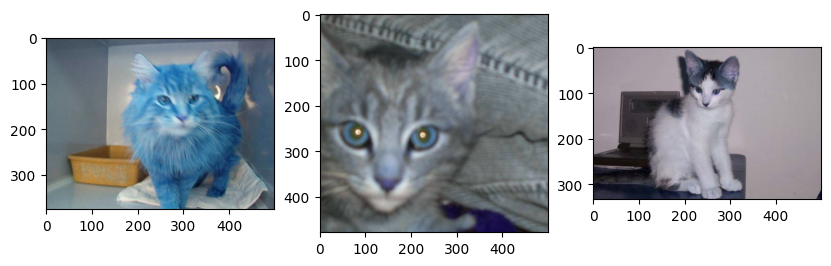

In [72]:
plt.figure(figsize=(10,7)) 
plt.subplot(1,3,1)
img = cv2.imread(blurry_cat_images[2])
plt.imshow(img) 

plt.subplot(1,3,2)
img = cv2.imread(blurry_cat_images[3])
plt.imshow(img) 

plt.subplot(1,3,3)
img = cv2.imread(blurry_cat_images[4])
plt.imshow(img) 

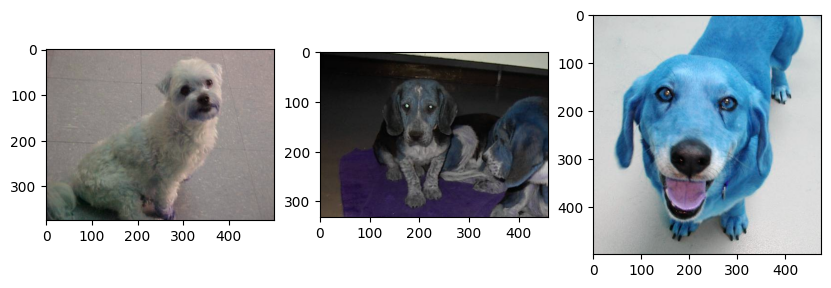

In [73]:
plt.figure(figsize=(10,7)) 
plt.subplot(1,3,1)
img = cv2.imread(blurry_dog_images[2])
plt.imshow(img) 

plt.subplot(1,3,2)
img = cv2.imread(blurry_dog_images[3])
plt.imshow(img) 

plt.subplot(1,3,3)
img = cv2.imread(blurry_dog_images[4])
plt.imshow(img) 

In [84]:
# to find and remove duplicates 
import hashlib 
def file_hash(file_path): 
    with open(file_path, 'rb') as f: 
        return hashlib.md5(f.read()).hexdigest() 
    
# to find duplicates in cat directory
path = 'data/train/cat'
path = pathlib.Path(path) 
paths = list(path.glob('*.jpg'))

duplicates = {}
 
for path in paths:
    file_hash(path)

# to find duplicates in cat directory
path = 'data/train/dog'
path = pathlib.Path(path) 
paths = list(path.glob('*.jpg'))
 
for path in paths: 
    file_hash(path)

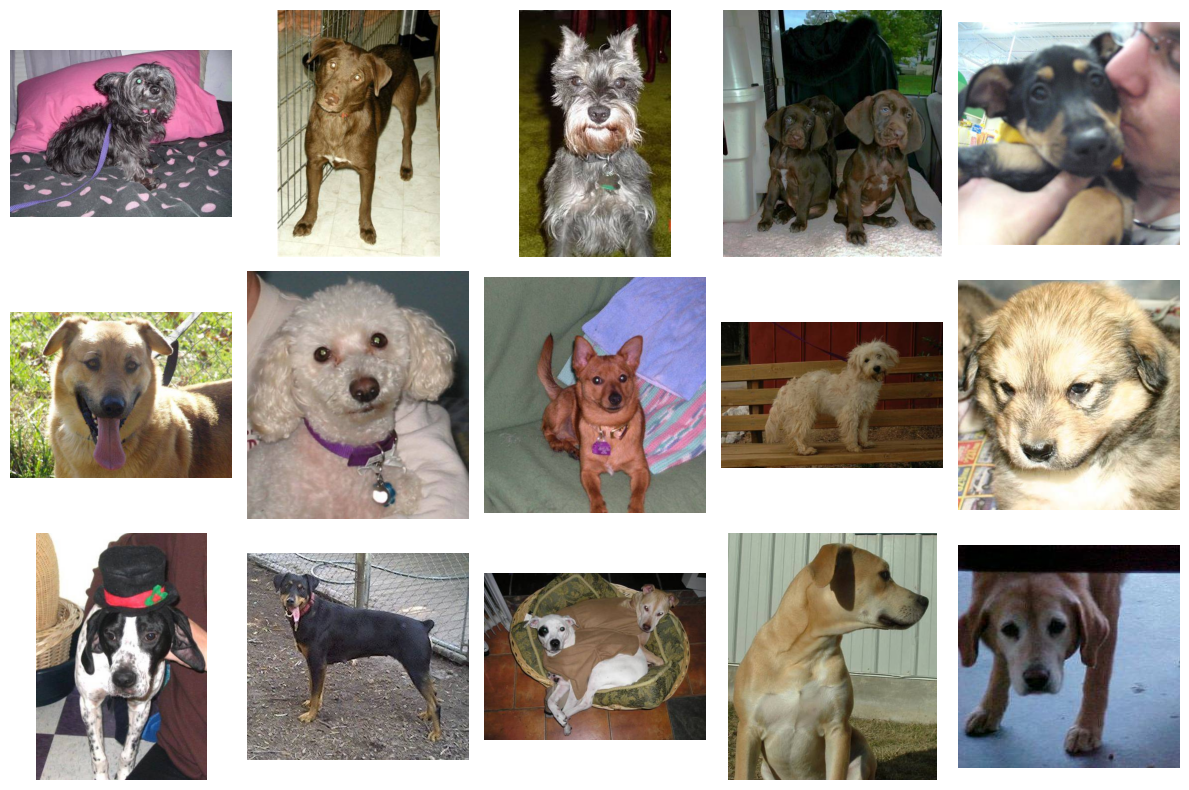

In [86]:
# grid display to spot anomailes 

img_folder = 'data/train/dog'
imgs = os.listdir(img_folder)

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, img_name in zip(axes.flatten(), imgs[:15]):
    img = Image.open(os.path.join(img_folder, img_name))
    ax.imshow(img)
    ax.axis('off') 
plt.tight_layout()
plt.show()


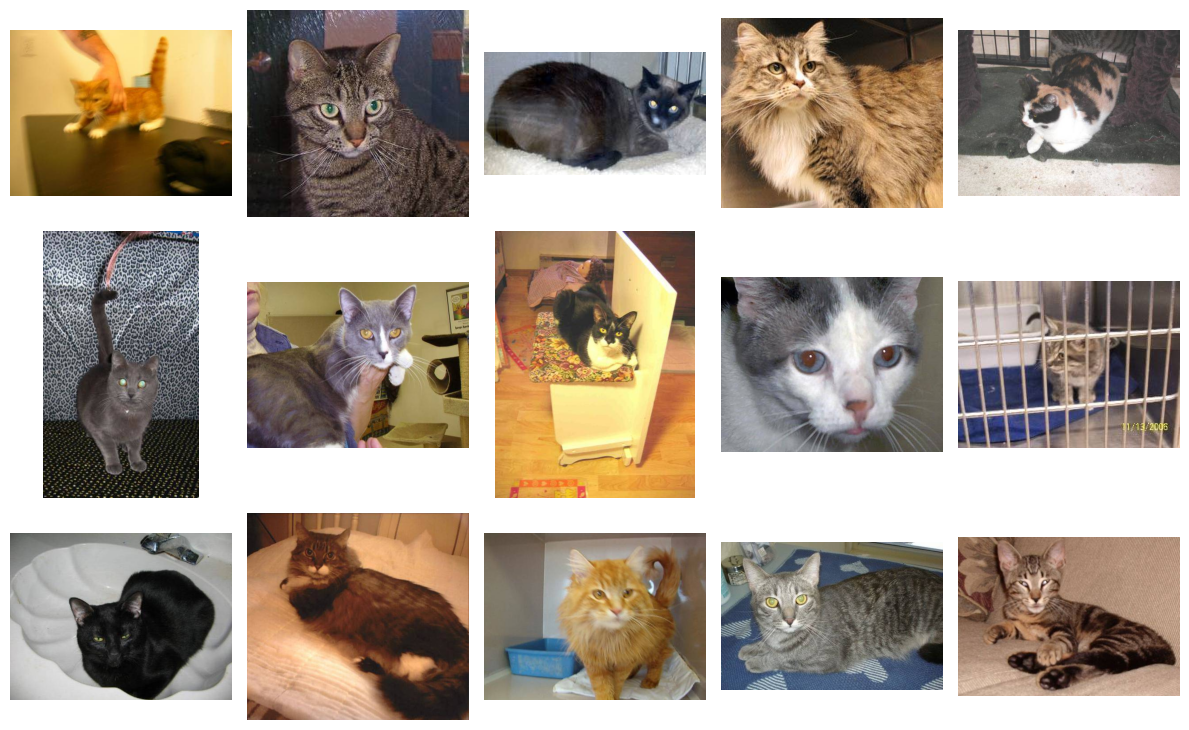

In [87]:
# grid display to spot anomailes 

img_folder = 'data/train/cat' 
imgs = os.listdir(img_folder)

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, img_name in zip(axes.flatten(), imgs[:15]):
    img = Image.open(os.path.join(img_folder, img_name))
    ax.imshow(img)
    ax.axis('off') 
plt.tight_layout()
plt.show()

In [151]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'data/train', 
    target_size = (180, 180), 
    batch_size = 32, 
    class_mode = 'sparse', 
    subset = 'training', 
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'data/train', 
    target_size = (180, 180), 
    batch_size = 32, 
    class_mode = 'sparse', 
    subset='validation', 
    shuffle=False
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [152]:
# label shape 
from tensorflow.keras.utils import Sequence

class SqueezedGenerator(Sequence): 
    def __init__(self, generator):
        self.generator = generator
    
    def __len__(self):
        return len(self.generator) 
    
    def __getitem__(self, index):
        X,y = self.generator[index]
        return X, np.squeeze(y)

train_generator_squeezed = SqueezedGenerator(train_generator)
val_generator_squeezed = SqueezedGenerator(val_generator) 

### Model Building 

In [158]:
from tensorflow.keras.applications import MobileNetV2

# mobilenetv2 model 
mobilenetv2_model = MobileNetV2(
    input_shape=(180, 180,3),
    include_top=False, 
    weights='imagenet'
)

mobilenetv2_model.trainable = False

In [159]:
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# CNN 
cnn = Sequential([
    # data augmentation 
    layers.RandomFlip('horizontal', input_shape=(180, 180,3)), 
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1), 
    layers.RandomContrast(0.1), 
    
    # mobilenetv2 model 
    mobilenetv2_model, 
    
    layers.GlobalAveragePooling2D(), 
    
    # 1st layer
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    
    # 2nd layer
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.2),
    
    # output layer
    layers.Dense(2, activation='softmax')
])


In [160]:
# compiling 
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [161]:
from sklearn.utils.class_weight import compute_class_weight

# calculate the class weights
labels = train_generator.classes 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

# Initial training
cnn.fit(
    train_generator_squeezed, 
    validation_data=val_generator_squeezed, 
    epochs=5
)

Epoch 1/5
625/625 [==============================] - 208s 324ms/step - loss: 0.1815 - accuracy: 0.9395 - val_loss: 0.0894 - val_accuracy: 0.9762
Epoch 2/5
625/625 [==============================] - 254s 407ms/step - loss: 0.1389 - accuracy: 0.9554 - val_loss: 0.0870 - val_accuracy: 0.9772
Epoch 3/5
625/625 [==============================] - 200s 320ms/step - loss: 0.1340 - accuracy: 0.9558 - val_loss: 0.0880 - val_accuracy: 0.9756
Epoch 4/5
625/625 [==============================] - 200s 320ms/step - loss: 0.1243 - accuracy: 0.9589 - val_loss: 0.0798 - val_accuracy: 0.9776
Epoch 5/5
625/625 [==============================] - 198s 316ms/step - loss: 0.1213 - accuracy: 0.9599 - val_loss: 0.0781 - val_accuracy: 0.9776


In [162]:
# fine tuning the model 
fine_tune_at = len(mobilenetv2_model.layers) - 50
mobilenetv2_model.trainable = True  

for layer in mobilenetv2_model.layers[:fine_tune_at]: 
    layer.trainable = False
    
# 2nd compiling 
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']  
)

In [164]:
# calbakcs
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True), 
    ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5) 
]

# final training 
history = cnn.fit(
    train_generator_squeezed,
    validation_data=val_generator_squeezed,
    epochs=5,
    callbacks=callbacks,
    class_weight=class_weights_dict
)


Epoch 1/5


625/625 [==============================] - 200s 319ms/step - loss: 0.1302 - accuracy: 0.9549 - val_loss: 0.0682 - val_accuracy: 0.9802 - lr: 1.0000e-05
Epoch 2/5
625/625 [==============================] - 241s 385ms/step - loss: 0.1156 - accuracy: 0.9622 - val_loss: 0.0680 - val_accuracy: 0.9798 - lr: 1.0000e-05
Epoch 3/5
625/625 [==============================] - 254s 407ms/step - loss: 0.1023 - accuracy: 0.9665 - val_loss: 0.0701 - val_accuracy: 0.9790 - lr: 1.0000e-05
Epoch 4/5
625/625 [==============================] - 251s 402ms/step - loss: 0.0935 - accuracy: 0.9709 - val_loss: 0.0668 - val_accuracy: 0.9804 - lr: 1.0000e-05
Epoch 5/5
625/625 [==============================] - 250s 401ms/step - loss: 0.0815 - accuracy: 0.9744 - val_loss: 0.0648 - val_accuracy: 0.9810 - lr: 1.0000e-05


In [169]:
cnn.evaluate(val_generator_squeezed)  

157/157 [==============================] - 7s 46ms/step - loss: 0.0648 - accuracy: 0.9810


[0.06481513381004333, 0.9810000061988831]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix 

In [175]:
y_pred_probs = cnn.predict(val_generator_squeezed) 
y_pred_probs 

157/157 [==============================] - 8s 44ms/step


array([[9.9759609e-01, 2.4039242e-03],
       [9.9910730e-01, 8.9271046e-04],
       [9.9999809e-01, 1.8595675e-06],
       ...,
       [1.9943336e-05, 9.9998009e-01],
       [5.3744636e-05, 9.9994624e-01],
       [7.2630005e-06, 9.9999273e-01]], dtype=float32)

In [176]:
y_pred_probs[0] 

array([0.9975961 , 0.00240392], dtype=float32)

In [177]:
np.argmax(y_pred_probs[0])

0

In [178]:
y_pred = [int(np.argmax(prob)) for prob in y_pred_probs] 

y_pred[:20] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [179]:
y_true = val_generator.classes
y_true[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [180]:
print(classification_report(y_true=y_true, y_pred=y_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2500
           1       0.98      0.98      0.98      2500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



Text(0.5, 1.0, 'Confusion Matrix')

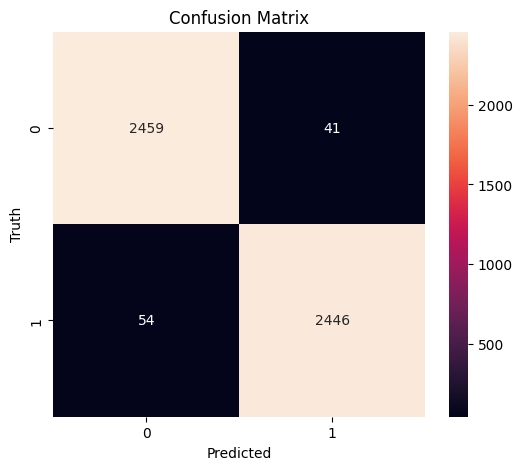

In [183]:
import seaborn as sn

# Confusion Matrix
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
plt.figure(figsize=(6, 5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')


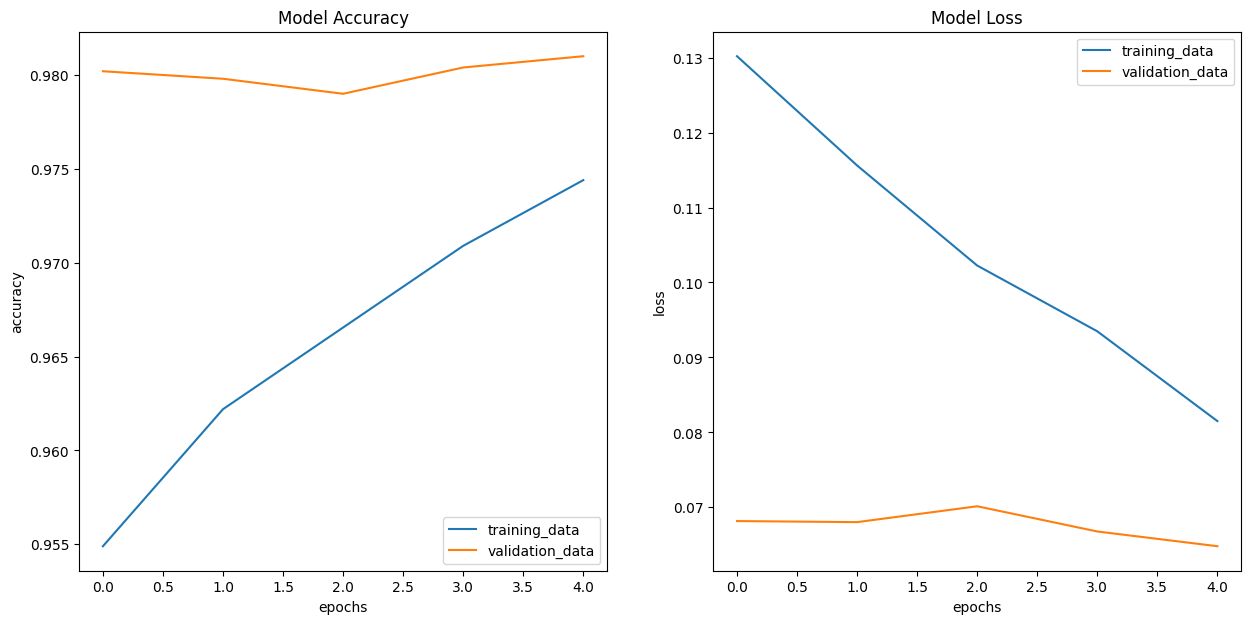

In [194]:
# model accuracy and loss graphs
plt.figure(figsize=(15,7)) 

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Accuracy')
plt.legend(['training_data', 'validation_data']) 

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model Loss')
plt.legend(['training_data', 'validation_data']) 


 

In [195]:
test_data_dir

WindowsPath('data/test1')

In [196]:
test_paths[0] 

WindowsPath('data/test1/1.jpg')

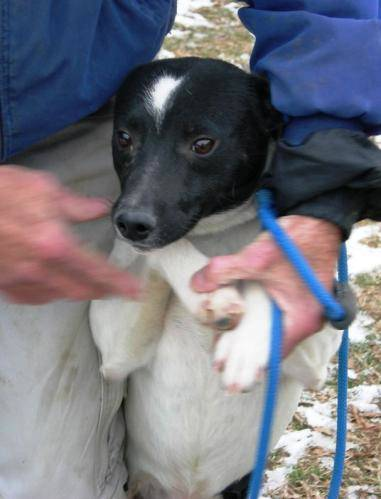

In [197]:
Image.open(test_paths[0]) 

In [198]:
from tensorflow.keras.preprocessing import image 

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(180,180)) 
    img_array = image.img_to_array(img) 
    img_array = img_array / 255.0 
    img_array = np.expand_dims(img_array, axis=0) 
    
    predictions = cnn.predict(img_array) 
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    class_indices = train_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()} 
    
    print(class_names[predicted_class])  

In [199]:
predict_image(test_paths[0]) 

1/1 [==============================] - 1s 864ms/step
dog


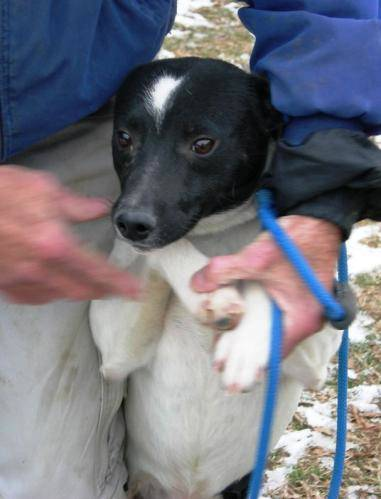

In [200]:
Image.open(test_paths[0]) 

In [201]:
len(test_paths)

12500

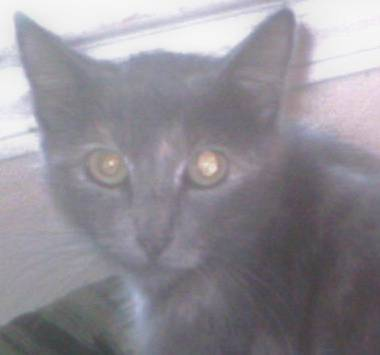

In [203]:
Image.open(test_paths[10000]) 

In [205]:
predict_image(test_paths[10000]) 

1/1 [==============================] - 0s 20ms/step
cat
